# METRICAS DE EVALUACIÓN

## GOMPERTZ

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Función que representa la ecuación diferencial del modelo Gompertz
def Gompertz(t, K, r):
    try:
        C = np.log(-np.log(volumen_mm3[0] / K))  # Usando el primer elemento de volumen_mm3 como t0
        N = K * np.exp(-np.exp(-r * t + C))
        return N
    except (ValueError, ZeroDivisionError):
        # Si se encuentra un error, se devuelve un valor alto para evitar el NaN
        return 1e6

# Datos Reales (t, N)
meses = np.array([0, 1, 2, 3, 4, 5, 6, 7])
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000

# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(Gompertz, meses, volumen_mm3, p0=[10000, 0.3], bounds=([1e-6, 0], [np.inf, np.inf]))

# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(0, 7, 100)

# Generar la curva ajustada
fitted_curve = Gompertz(meses, *params)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(volumen_mm3, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(volumen_mm3, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 44491.12729702266
Coeficiente de Determinación (R^2): 0.9923050693249124


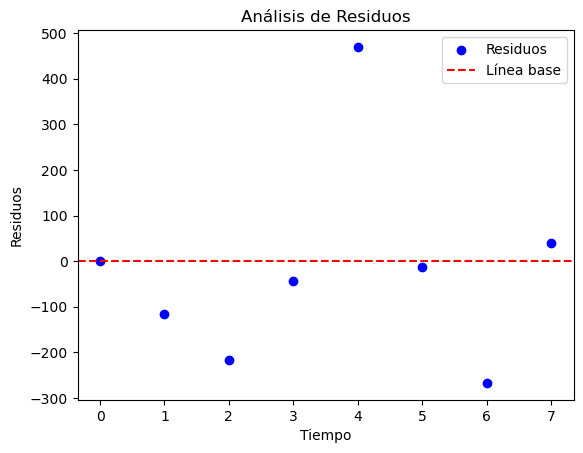

In [5]:
residuos = volumen_mm3 - fitted_curve
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000
# Visualizar los residuos
plt.scatter(meses, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()

## LOGÍSTICO MODIFICADO

In [7]:
volumen = np.array([6.0, 5.5, 5.3, 5.0, 4.9])
volumen_mm3 = volumen * 1000
N0 = volumen_mm3[0]
# Función que representa la solución de la ecuación diferencial del modelo
def modified_log(t, K, r, p):
    t0=3
    denominador = -N0 * r * np.exp(t0 * (r - p)) + K * (r - p) * np.exp(t0 * (r - p)) 
    C = volumen_mm3[0] / denominador
    N = (K * (r - p) * C * np.exp(t * (r - p))) / (1 + r * C * np.exp(t * (r - p)))
    return N

# Datos Reales (t, N)
meses = np.array([3, 4, 5, 6, 7])


# Ajustar el modelo Gompertz a los datos observados utilizando curve_fit
params, covariance = curve_fit(modified_log, meses, volumen_mm3, p0=[10000, 0.3,0.1], bounds=([1e-6, 0,0], [np.inf, np.inf,np.inf]))
r=params[1]
K=params[0]
p=params[2]
# Generar puntos en el tiempo para la visualización
t_eval = np.linspace(4, 7, 100)
fitted_curve = modified_log(meses, *params)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(volumen_mm3, fitted_curve)

# Calcular el Coeficiente de Determinación (R^2)
r2 = r2_score(volumen_mm3, fitted_curve)
print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)

Error Cuadrático Medio (MSE): 1310.377776525825
Coeficiente de Determinación (R^2): 0.9915130973022939


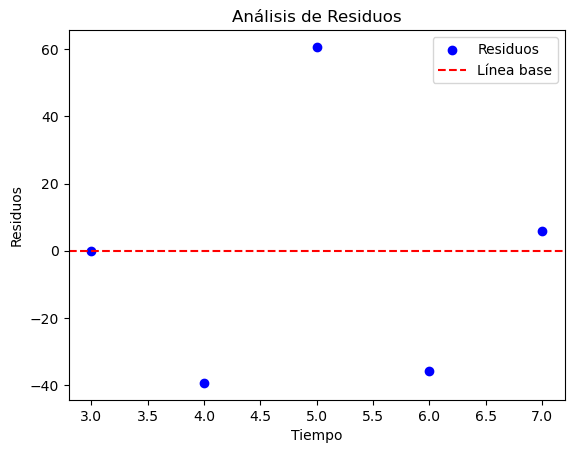

In [8]:
residuos = volumen_mm3 - fitted_curve
volumen = np.array([2.0, 3.5, 5.0, 6.5, 8.0, 8.2, 8.4, 9.0])
volumen_mm3 = volumen * 1000
# Visualizar los residuos
plt.scatter(meses, residuos, color='blue', label='Residuos')
plt.axhline(y=0, color='red', linestyle='--', label='Línea base')

plt.xlabel('Tiempo')
plt.ylabel('Residuos')
plt.title('Análisis de Residuos')
plt.legend()
plt.show()